In [2]:
import matplotlib.pyplot as plt
from numpy.random import *
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab

In [2]:
class RandomVar:
    
    def mean():
        pass
    def sample():
        pass

## Chines restaurant process (for when base dist is uniform in N?)

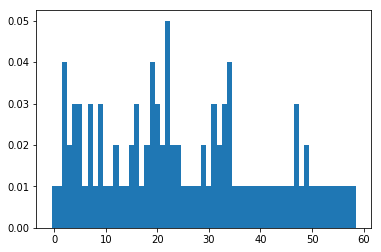

[[0], [1], [2, 53, 65, 87], [3, 92], [4, 27, 31], [5, 35, 99], [6], [7, 58, 84], [8], [9, 75, 98], [10], [11], [12, 59], [13], [14], [15, 55], [16, 61, 91], [17], [18, 43], [19, 69, 79, 96], [20, 38, 88], [21, 62], [22, 32, 44, 80, 94], [23, 42], [24, 52], [25], [26], [28], [29], [30, 51], [33], [34, 40, 73], [36, 86], [37, 83, 89], [39, 57, 64, 97], [41], [45], [46], [47], [48], [49], [50], [54], [56], [60], [63], [66], [67, 70, 74], [68], [71, 85], [72], [76], [77], [78], [81], [82], [90], [93], [95]]
[0.01, 0.01, 0.04, 0.02, 0.03, 0.03, 0.01, 0.03, 0.01, 0.03, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.03, 0.01, 0.02, 0.04, 0.03, 0.02, 0.05, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.03, 0.02, 0.03, 0.04, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


In [3]:
def crp(ap=10,num=100):
    """chinese restaurant process (equivalent representation of Dirichlet)
        param: ap: alpha, its maginitude rises inversely with rich gets richer"""
    
#     num = 100
#     ap = 10
    # first customer goes to first table
    tables = [[0]]
    size = [1]
    
    for n in range(1,num):
        # compute categorical distribution for customer assignment
        cat = []
        denom = n+ap #n+1-1+ap
        for i in range(len(size)):
            cat.append(size[i] / denom)
        # new table probability
        cat.append(ap / denom)
        assert(sum(cat) - 1 < 0.0001)
        
        # draw next table
        table = choice(len(cat), p=cat)
        
        # new table
        if table == len(cat) - 1:
            tables.append([n])
            size.append(1)
        # old table
        else:
            tables[table].append(n)
            size[table] += 1
           
    # return support and prob
    return np.arange(len(size)), [s/num for s in size], tables
_,p,tables = crp(ap=50)
plt.figure()
plt.bar(range(len(p)), p,width=1)
plt.show()
print(tables)
print(p)

    

{0.731637743538923: [3, 10, 16, 24, 35, 57, 58, 66, 82, 85], 1.589286831469963: [1, 11, 38], 2.756217074234935: [9], 3.5825975558933694: [5, 43, 54, 77, 81], 4.386841095425288: [8, 15, 80], 5.24867646828935: [0, 65, 96, 97], 6.247684427249033: [53], 1.0210294512527416: [7, 50, 88, 89], 8.771811587144374: [4, 13, 72], -2.1658520011255904: [90], 8.143410473733324: [74], 2.912280133805466: [18, 27], 3.76553065982902: [26], 1.9792385897690161: [20, 28, 73], 0.31228568446105975: [91], 4.945642522515993: [84], 5.234181151339513: [12, 52, 67, 86], 5.189637795691359: [32, 47], 3.857021610134171: [62], 2.7084362608598993: [64, 69, 98], 1.6654050218465812: [22], 6.516389535666989: [42], 0.48986204489098784: [29, 46, 51], 2.9804601026441286: [79], 7.187704745011607: [56], 3.4201417546661963: [17], 8.28205004023652: [60, 61], 0.39590960076964166: [71], 2.3492225736610726: [31, 37], 6.12693757725113: [94], -1.5142653601029412: [2], 3.967051602168899: [40, 68, 75], 1.340547832255373: [83], 2.5560614

/opt/rh/rh-python35/root/usr/lib/python3.5/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


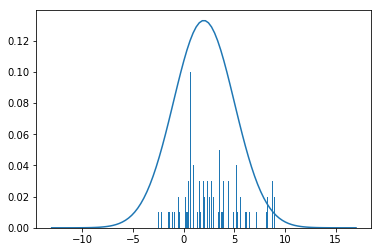

In [4]:
def DP(mu, sg, num, ap):
    """dirichlet process with Gaussian base distribution"""
    tables = dict()
    #first value drawn from G
    nval = normal(mu,sg)
    tables[nval] = [0]
    
    for n in range(1,num):
        # compute categorical distribution for customer assignment
        cat = []
        denom = n+ap #n+1-1+ap
        
        key = []
        for k,v in tables.items():
            key.append(k)
            cat.append(len(v) / denom)
            
        # new table probability
        cat.append(ap / denom)
        assert(sum(cat) - 1 < 0.0001)
        
        # draw from past values or draw new value from G?
        table = choice(len(cat), p=cat)
        
        # new value from G
        if table == len(cat) - 1:
            nval = normal(mu,sg)
            tables[nval] = [n]
            
        # past values
        else:
            tables[key[table]].append(n)
           
    return tables
    
tables = DP(2,3,100,50)

print(tables)
n = sum([len(v) for v in tables.values()])
plt.figure()
plt.bar(tables.keys(), [len(v)/n for v in tables.values()], width=0.1)
sd = math.sqrt(3)
mu = 2; sd = 3
x = np.linspace(mu - 5*sd, mu + 5*sd, 100)
plt.plot(x,mlab.normpdf(x, mu, sd))
plt.show()

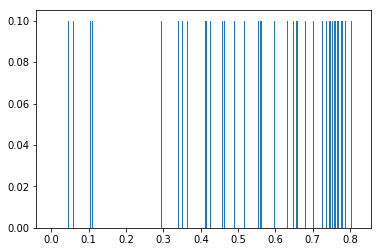

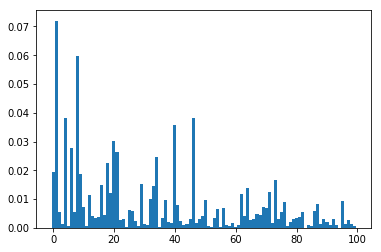

In [5]:
# stick breaking
def GEM(ap,K):
    """Griffiths-Engen-McCloskey"""
    
    #sample from Beta(1,ap)
    bt = beta(1,ap,K)
    #first sample is v_0
    sample = [bt[0]]
    pd = (1-bt[0])
    for i in range(1,K):
        sample.append(bt[i]*pd)
        pd *= (1-bt[i])
    return sample
def stickBreaking(ap,K=1000):
    """table in N just like Chinese Restaurant"""
    support = np.arange(K)
    p = GEM(ap,K)
    return np.array(support), np.array(p)
plt.figure()
sample = GEM(50, 100)
plt.bar(np.cumsum(sample),0.1,width=0.001)



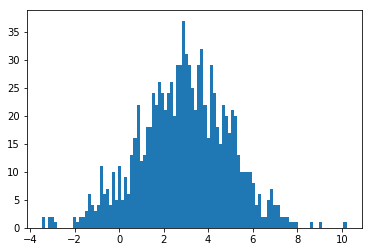

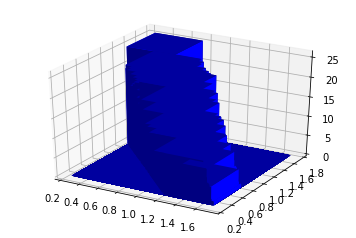

In [6]:
smpl = normal(3,2,1000)
plt.figure()
plt.hist(smpl, bins=100)

s = dirichlet([1,2],1000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(s[:,0], s[:,1], bins=100)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

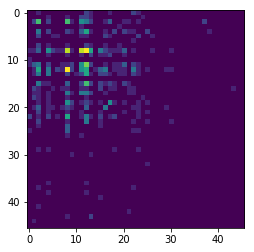

In [7]:
def DirichletNet(ap,N):
    """Dirchlet Network Distribution, N is size of adj matrix"""
    _,p,_ = crp(ap=ap,num=1000)
    # (truncated) support size
    sz = len(p)
    sr = choice(sz,size=(N,2),replace=True,p=p)
    adj = np.zeros((sz,sz), dtype=int)
    for s,r in sr:
        adj[s,r] += 1
    return adj

adj = DirichletNet(10,500)
plt.figure()
plt.imshow(adj)
plt.show()

## Hierachical Dirichlet

56 57


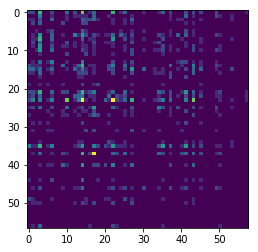

In [12]:
def DPCat(p, ap=10, num=1000):
    """Dirichlet process with base Categorical distribution p"""
    
    # (truncated) support according to p
    sz = len(p)
    
    size = dict()
    #first value drawn from p
    nval = choice(sz,p=p)
    size[nval] = 1
    
    for n in range(1,num):
        # compute categorical distribution for customer assignment
        cat = []
        denom = n+ap #n+1-1+ap
        
        key = []
        for k,v in size.items():
            key.append(k)
            cat.append(v / denom)
            
        # new table probability
        cat.append(ap / denom)
        assert(abs(sum(cat) - 1) < 0.0001)
        
        # draw from past values or draw new value from P?
        table = choice(len(cat), p=cat)
        
        # new value from G
        if table == len(cat) - 1:
            nval = choice(sz,p=p)
            if nval in size:
                size[nval] += 1
            else:
                size[nval] = 1
            
        # past values
        else:
            size[key[table]] += 1
           
    # convert dict to support and prob
    return np.array(list(size.keys())), np.array([s/num for s in size.values()])

def AsDirichletNet(gamma, tau,N=500):
    """Asymmetric Dirichlet Network Distribution having a hierachical process"""
    
    _,P,_ = crp(ap=gamma, num=100)
    
    As, Ap = DPCat(P, tau, num=100)
    s = As[choice(len(As), size=N, p=Ap)]
    
    Bs, Bp = DPCat(P, tau, num=100)
    r = Bs[choice(len(Bs), size=N, p=Bp)]
    
    #max of support
    sz0 = max(As)
    sz1 = max(Bs)
    print(max(As), max(Bs))
    
    adj = np.zeros((sz0+1,sz1+1), dtype=int)
    for ss,rr in zip(s,r):
        adj[ss, rr] +=1  
        
    return adj 
adj = AsDirichletNet(50,50,1000)
plt.imshow(adj)
plt.show()

In [ ]:
# Mixture of dirichlet network
def MixDirichletNet(gamma,tau,ap,num=100):
    Ds, Dp = stickBreaking(ap=ap)
    c = Ds[choice(len(Ds), size=N, p=Dp)]
    no_clus = max(c) + 1
    
    _,P,_ = crp(ap=gamma, num=100)

    As, Ap = DPCat(P, tau, num=100)
    s = As[choice(len(As), size=N, p=Ap)]

    Bs, Bp = DPCat(P, tau, num=100)
    r = Bs[choice(len(Bs), size=N, p=Bp)]

    #max of support
    sz0 = max(As)
    sz1 = max(Bs)
    print(max(As), max(Bs))

    adj = np.zeros((sz0+1,sz1+1), dtype=int)
    for ss,rr in zip(s,r):
        adj[ss, rr] +=1  

        return adj 

4.98828052484 0.009900990099009901


/opt/rh/rh-python35/root/usr/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


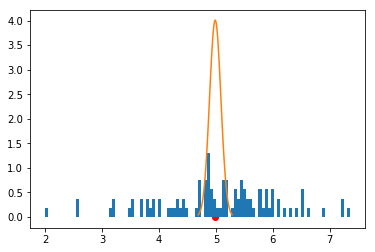

In [9]:
# mu ~ Normal(mu_0, simga_0)
# x ~ Normal(mu, sigma)

import matplotlib.mlab as mlab
def gaussian_mean_prior(X, sg, mu_0, sg_0):
    N = len(X)
    mu_h = sg*mu_0/(N*sg_0+sg) + sg_0*np.sum(X)/(N*sg_0+sg)
    sg_h = 1 / (N/sg+1/sg_0)
    return mu_h, sg_h

X = normal(5,1,100)
mu_h,sg_h = gaussian_mean_prior(X,1,1,1)

plt.figure()
plt.hist(X,bins=100,density=True)
print(mu_h, sg_h)
plt.scatter(mu_h,0,c='red')
sigma = math.sqrt(sg_h)
x = np.linspace(mu_h - 3*sigma, mu_h + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu_h, sigma))
plt.show()